In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
startHour = 8

In [13]:
df_speciesConc = pd.read_csv('speciesConcentrations.output', sep='\s+', index_col=0)

In [14]:
df_speciesConc

,CH4,CO,O3,NO2,NO,OH,HO2,CH3O2
t,,,,,,,,
0.0,4.900000e+13,3.600000e+12,5.200000e+11,2.400000e+11,0.000000e+00,0.0,0.0,0.0
300.0,4.899995e+13,3.599862e+12,6.117675e+11,1.479473e+11,9.165890e+10,638702.3,962460.5,283270.1
600.0,4.899988e+13,3.599692e+12,6.129922e+11,1.464816e+11,9.270552e+10,750447.1,1121267.0,329103.3
900.0,4.899981e+13,3.599496e+12,6.138267e+11,1.453966e+11,9.334477e+10,854408.5,1271826.0,372197.1
1200.0,4.899972e+13,3.599277e+12,6.146233e+11,1.443407e+11,9.392800e+10,952540.8,1413389.0,412420.4
...,...,...,...,...,...,...,...,...
85200.0,4.896282e+13,3.529507e+12,6.134437e+11,2.224642e+10,1.191899e+10,4592191.0,58217990.0,15566450.0
85500.0,4.896237e+13,3.528627e+12,6.155346e+11,2.192931e+10,1.191772e+10,4985897.0,63132810.0,16899400.0
85800.0,4.896189e+13,3.527671e+12,6.177759e+11,2.161416e+10,1.189479e+10,5394771.0,68361770.0,18316210.0


<Axes: xlabel='t'>

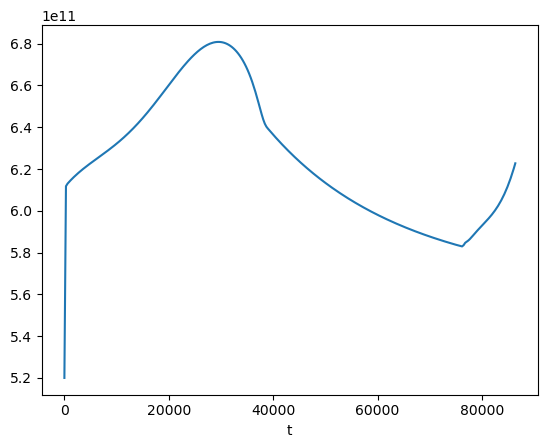

In [15]:
df_speciesConc['O3'].plot()